In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("jainilcoder/online-payment-fraud-detection")

print("Path to dataset files:", path)

df = pd.read_csv(path + "/onlinefraud.csv")
print(df.head())

100%|██████████| 178M/178M [00:01<00:00, 134MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/jainilcoder/online-payment-fraud-detection/versions/1
   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               

# **LINEAR REGRESSION**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report
import numpy as np

# One-hot encode 'type' column
df_encoded = pd.get_dummies(df, columns=['type'], drop_first=True)

# Define features (X) and target (y)
X = df_encoded.drop(['isFraud', 'isFlaggedFraud', 'nameOrig', 'nameDest'], axis=1)
y = df_encoded['isFraud']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
# Initialize model
lin_reg = LinearRegression()

# Train
lin_reg.fit(X_train, y_train)


LinearRegression()

In [ ]:
# Predict continuous values
y_pred_cont = lin_reg.predict(X_test)

# Convert to binary using 0.5 threshold
y_pred_binary = (y_pred_cont >= 0.5).astype(int)

# Evaluate
mse = mean_squared_error(y_test, y_pred_cont)
accuracy = accuracy_score(y_test, y_pred_binary)

print(f"Mean Squared Error: {mse:.4f}")
print(f"Accuracy (thresholded): {accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_binary, target_names=['Not Fraud', 'Fraud']))


Mean Squared Error: 0.0011
Accuracy (thresholded): 0.9989
Classification Report:
              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00   1270881
       Fraud       0.99      0.11      0.20      1643

    accuracy                           1.00   1272524
   macro avg       1.00      0.56      0.60   1272524
weighted avg       1.00      1.00      1.00   1272524



# **KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# One-hot encode 'type'
df_knn = pd.get_dummies(df, columns=['type'], drop_first=True)

# Define features and target
X_knn = df_knn.drop(['isFraud', 'isFlaggedFraud', 'nameOrig', 'nameDest'], axis=1)
y_knn = df_knn['isFraud']

In [ ]:
# Split the data
X_knn_train, X_knn_test, y_knn_train, y_knn_test = train_test_split(
    X_knn, y_knn, test_size=0.2, random_state=42, stratify=y_knn)

In [ ]:
# Scale features
scaler = StandardScaler()
X_knn_train_scaled = scaler.fit_transform(X_knn_train)
X_knn_test_scaled = scaler.transform(X_knn_test)

# Initialize and train KNN classifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_knn_train_scaled, y_knn_train)

KNeighborsClassifier()

KNN doesnt works for large data sets

# **LOGISTIC REGRESSION**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd


In [ ]:
# One-hot encode 'type'
df_log = pd.get_dummies(df, columns=['type'], drop_first=True)

# Define features and target
X_log = df_log.drop(['isFraud', 'isFlaggedFraud', 'nameOrig', 'nameDest'], axis=1)
y_log = df_log['isFraud']

# Train-test split
X_log_train, X_log_test, y_log_train, y_log_test = train_test_split(
    X_log, y_log, test_size=0.2, random_state=42, stratify=y_log)

# Scale features
scaler_log = StandardScaler()
X_log_train_scaled = scaler_log.fit_transform(X_log_train)
X_log_test_scaled = scaler_log.transform(X_log_test)


In [ ]:
# Initialize the model
log_model = LogisticRegression(max_iter=1000, random_state=42)

# Train
log_model.fit(X_log_train_scaled, y_log_train)


LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
# Predict
y_log_pred = log_model.predict(X_log_test_scaled)

# Evaluate
log_accuracy = accuracy_score(y_log_test, y_log_pred)
print(f"Logistic Regression Accuracy: {log_accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_log_test, y_log_pred, target_names=['Not Fraud', 'Fraud']))


Logistic Regression Accuracy: 0.9992
Classification Report:
              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00   1270881
       Fraud       0.91      0.40      0.55      1643

    accuracy                           1.00   1272524
   macro avg       0.95      0.70      0.78   1272524
weighted avg       1.00      1.00      1.00   1272524



# **DESCISION TREE CLASSIFICATION**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# One-hot encode the 'type' column
df_dt = pd.get_dummies(df, columns=['type'], drop_first=True)

# Define features and target
X_dt = df_dt.drop(['isFraud', 'isFlaggedFraud', 'nameOrig', 'nameDest'], axis=1)
y_dt = df_dt['isFraud']

# Split into training and testing sets
X_dt_train, X_dt_test, y_dt_train, y_dt_test = train_test_split(
    X_dt, y_dt, test_size=0.2, random_state=42, stratify=y_dt)


In [ ]:
# Initialize the model
dt_model = DecisionTreeClassifier(max_depth=10, random_state=42)

# Train the model
dt_model.fit(X_dt_train, y_dt_train)


DecisionTreeClassifier(max_depth=10, random_state=42)

In [ ]:
# Predict on test set
y_dt_pred = dt_model.predict(X_dt_test)

# Evaluate performance
dt_accuracy = accuracy_score(y_dt_test, y_dt_pred)
print(f"Decision Tree Accuracy: {dt_accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_dt_test, y_dt_pred, target_names=["Not Fraud", "Fraud"]))


Decision Tree Accuracy: 0.9996
Classification Report:
              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00   1270881
       Fraud       0.96      0.75      0.84      1643

    accuracy                           1.00   1272524
   macro avg       0.98      0.88      0.92   1272524
weighted avg       1.00      1.00      1.00   1272524



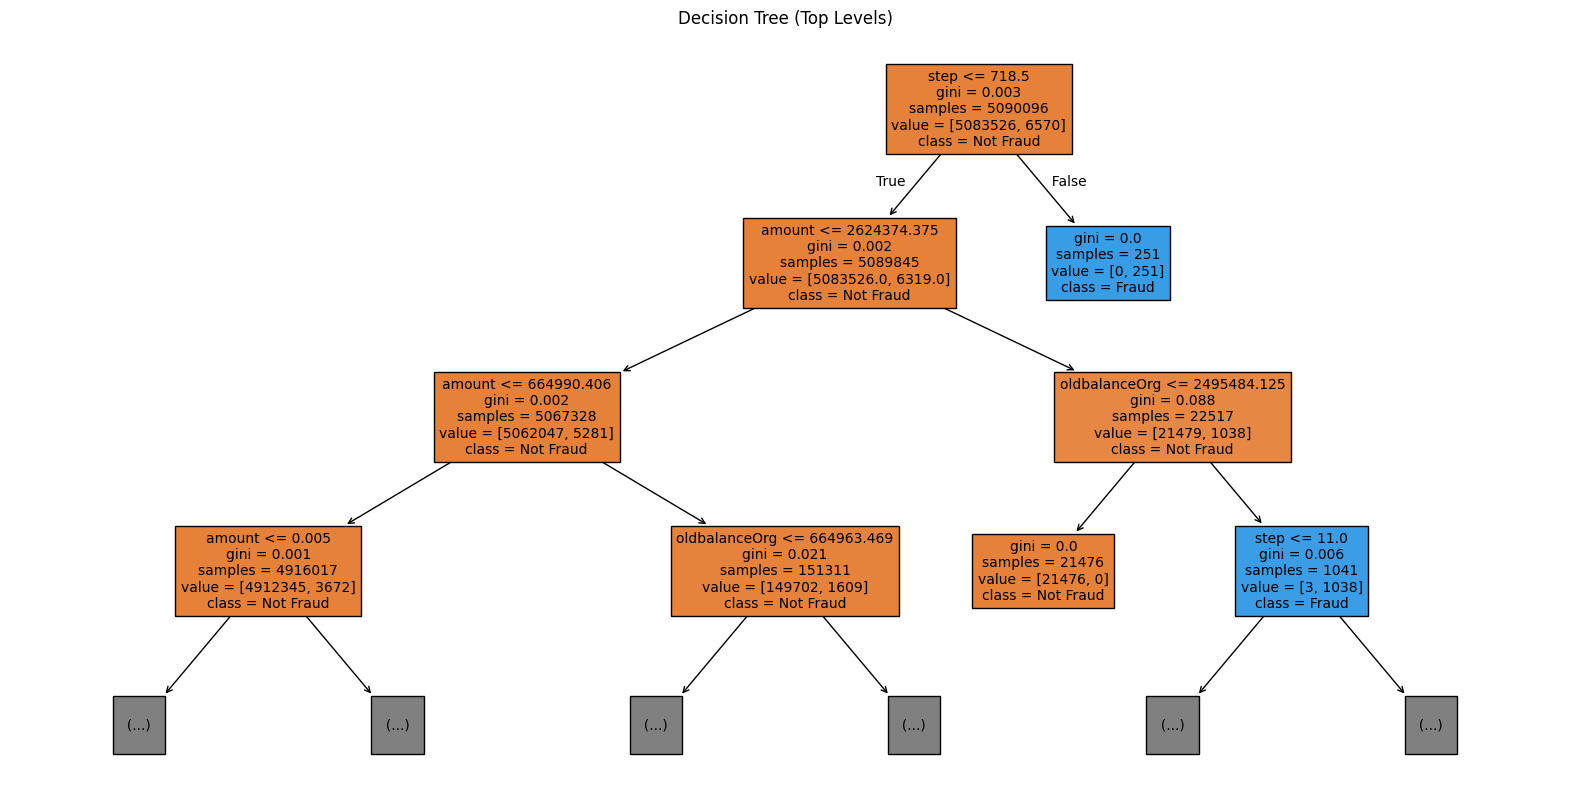

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(dt_model,
          feature_names=X_dt.columns,
          class_names=["Not Fraud", "Fraud"],
          filled=True,
          max_depth=3,     # Show only top 3 levels for clarity
          fontsize=10)
plt.title("Decision Tree (Top Levels)")
plt.show()


# **NAIVE BAYES**

Accuracy: 0.3557

Classification Report:
              precision    recall  f1-score   support

   Not Fraud       1.00      0.35      0.52   1270881
       Fraud       0.00      1.00      0.00      1643

    accuracy                           0.36   1272524
   macro avg       0.50      0.68      0.26   1272524
weighted avg       1.00      0.36      0.52   1272524



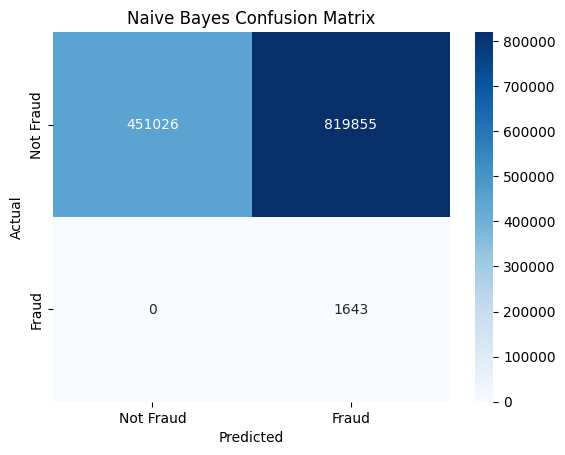

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assume df is your fraud dataset
df_nb = pd.get_dummies(df, columns=["type"], drop_first=True)

# Define features and label
X = df_nb.drop(["isFraud", "isFlaggedFraud", "nameOrig", "nameDest"], axis=1)
y = df_nb["isFraud"]

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42, test_size=0.2)

# Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model
model = GaussianNB()
model.fit(X_train_scaled, y_train)

# Predict
y_pred = model.predict(X_test_scaled)

# Evaluate
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Not Fraud", "Fraud"]))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Not Fraud", "Fraud"], yticklabels=["Not Fraud", "Fraud"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Naive Bayes Confusion Matrix")
plt.show()


# **XGBoost**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("jainilcoder/online-payment-fraud-detection")
df = pd.read_csv(path + "/onlinefraud.csv")


In [ ]:
# Drop identifiers
df = df.drop(columns=["nameOrig", "nameDest"])

# One-hot encode the 'type' column
df = pd.get_dummies(df, columns=["type"], drop_first=True)


In [ ]:
X = df.drop(columns=["isFraud"])
y = df["isFraud"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [ ]:
model = XGBClassifier(
    objective='binary:logistic',
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    eval_metric='logloss',
    use_label_encoder=False,
    n_jobs=-1,
    random_state=42
)

model.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:01:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=-1, num_parallel_tree=None, random_state=42, ...)

In [ ]:
y_pred = model.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.9997
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.98      0.76      0.86      1643

    accuracy                           1.00   1272524
   macro avg       0.99      0.88      0.93   1272524
weighted avg       1.00      1.00      1.00   1272524

Confusion Matrix:
[[1270850      31]
 [    387    1256]]
